1. Create the following data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV. Apply the Logistic Regression to perform the following.

a. Calculate the coefficients (B0, B1 and B2).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error and B2 v/s error.

f. Use scikit learn model to repeat the above steps and compare the results.

Iteration 0/50, Cost: 0.5963124834868424
Iteration 1/50, Cost: 0.5675363669483697
Iteration 2/50, Cost: 0.543237557373727
Iteration 3/50, Cost: 0.5211942474831339
Iteration 4/50, Cost: 0.5010127978163286
Iteration 5/50, Cost: 0.4824617049112968
Iteration 6/50, Cost: 0.46534988106796316
Iteration 7/50, Cost: 0.4495131281719604
Iteration 8/50, Cost: 0.43480994645340887
Iteration 9/50, Cost: 0.4211183199039941
Iteration 10/50, Cost: 0.40833286208586533
Iteration 11/50, Cost: 0.396362318055583
Iteration 12/50, Cost: 0.38512741890452606
Iteration 13/50, Cost: 0.37455906122984195
Iteration 14/50, Cost: 0.3645967733451198
Iteration 15/50, Cost: 0.3551874282260391
Iteration 16/50, Cost: 0.34628416549835583
Iteration 17/50, Cost: 0.337845488798434
Iteration 18/50, Cost: 0.3298345093510783
Iteration 19/50, Cost: 0.3222183110103984
Iteration 20/50, Cost: 0.3149674160159644
Iteration 21/50, Cost: 0.30805533422255266
Iteration 22/50, Cost: 0.3014581815542285
Iteration 23/50, Cost: 0.295154355945771

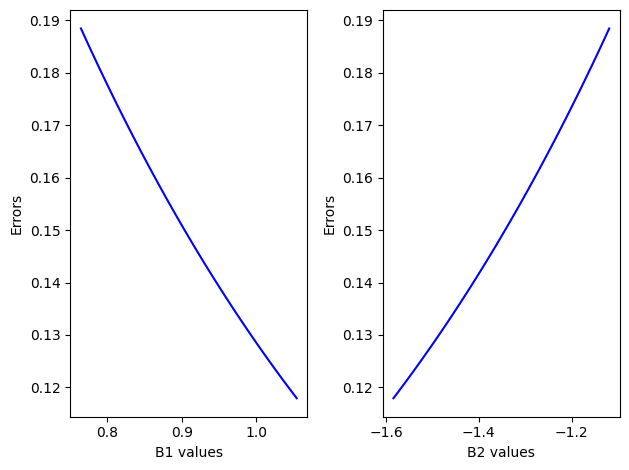

Sklearn model:
Model Coefficients(w1,w2,b):
w1,w2:[[ 1.21740631 -0.16127466]]
b:[-5.30180403]
Accuracy:1.0
Error:2.220446049250313e-16


C:\Users\rsurs\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import copy 
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data.csv')
x,y = df[['X1','X2']].values,df['Y'].values

def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(w,x[i]) + b)
        cost += -y[i]*(np.log(f_wb_i)) - (1-y[i])*np.log(1-f_wb_i)
    cost /= m
    return cost 

def compute_gradient(x,y,w,b):
    m,n = x.shape 
    dj_dw,dj_db = np.zeros(n),0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) +  b)
        error = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += error * x[i,j]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,alpha,iters):
    j_hist = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(iters+1):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        cost = compute_cost(x,y,w,b)
        j_hist.append(cost)
        print(f"Iteration {i}/{iters}, Cost: {j_hist[i]}")
    return w,b,j_hist

w_tmp,b_tmp,alpha,iters = np.zeros(x.shape[1]),0.,0.1,50
w,b,j_hist = gradient_descent(x,y,w_tmp,b_tmp,alpha,iters)
print(f"Updated paramters (w1,w2):{w}, b:{b}")
err = compute_cost(x,y,w,b)
print(f"MSE: {err}")

def accuracy(x,w,b):
    m = x.shape[0]
    pred = []
    num_correct_pred = 0
    for i in range(m):
        y_pred = sigmoid(np.dot(w,x[i])+b)
        if y_pred < 0.5:
            num_correct_pred += 1
            pred.append(0)
        elif y_pred > 0.5:
            num_correct_pred += 1
            pred.append(1)
    accuracy = num_correct_pred/len(pred)
    return accuracy 

acc_manual = accuracy(x,w,b)
print(f"Accuracy of the model: {acc_manual}") 

b1_val,b2_val,mse = [],[],[]
for i in range(iters+1):
    dj_dw,dj_db = compute_gradient(x,y,w,b)
    w -= alpha*dj_dw
    b -= alpha*dj_db
    error = compute_cost(x,y,w,b)
    b1_val.append(w[0])
    b2_val.append(w[1])
    mse.append(error)
plt.subplot(1,2,1)
plt.plot(b1_val,mse,c='b')
plt.xlabel('B1 values')
plt.ylabel('Errors')
plt.subplot(1,2,2)
plt.plot(b2_val,mse,c='b')
plt.xlabel('B2 values')
plt.ylabel('Errors')
plt.tight_layout()
plt.show()

y = df['Y'].values.reshape(-1,1)
model = LogisticRegression()
model.fit(x,y)
y_pred = model.predict(x)
accuracy_sklearn = accuracy_score(y,y_pred)
error_sklearn = log_loss(y,y_pred)
print(f"Sklearn model:\nModel Coefficients(w1,w2,b):\nw1,w2:{model.coef_}\nb:{model.intercept_}\nAccuracy:{accuracy_sklearn}\nError:{error_sklearn}")

2. Use above data set for one independent variable (X=X1) and one dependent variable (Y) in CSV. Applying Logistic Regression, explore the relationship between independent and dependent variables.

a. Calculate the coefficients (B0, and B1).

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. List the model parameters along with error for every instance of the training data.

e. Plot the graph of B1 v/s error.

f. Visualize the following binary cross entropy function for logistic regression using the above training data Plot y=1 and y=0 cases separately, and then plot the combined graph by considering X in X-axis and cost in Y-axis.

Iterations 0/50, Cost:0.6007179812224619
Iterations 1/50, Cost:0.5897449699625568
Iterations 2/50, Cost:0.5848715539117113
Iterations 3/50, Cost:0.5809313369848962
Iterations 4/50, Cost:0.5771937461972803
Iterations 5/50, Cost:0.57352633185277
Iterations 6/50, Cost:0.5699023551024214
Iterations 7/50, Cost:0.5663159573849357
Iterations 8/50, Cost:0.5627656202006597
Iterations 9/50, Cost:0.5592507498098922
Iterations 10/50, Cost:0.5557709520050722
Iterations 11/50, Cost:0.5523258760603733
Iterations 12/50, Cost:0.5489151810725816
Iterations 13/50, Cost:0.5455385288070971
Iterations 14/50, Cost:0.5421955822766504
Iterations 15/50, Cost:0.5388860055414783
Iterations 16/50, Cost:0.5356094637574433
Iterations 17/50, Cost:0.5323656232668752
Iterations 18/50, Cost:0.5291541516915599
Iterations 19/50, Cost:0.5259747180212793
Iterations 20/50, Cost:0.5228269926976055
Iterations 21/50, Cost:0.519710647693474
Iterations 22/50, Cost:0.5166253565889425
Iterations 23/50, Cost:0.5135707946434045
Itera

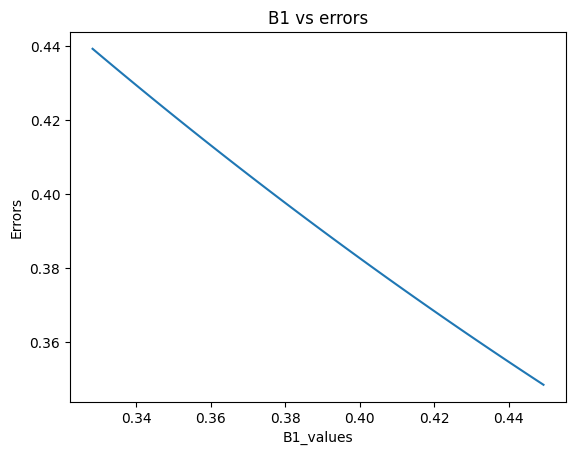


Sklearn model
Model Coefficients w:[[1.22553095]], b:[-5.72049426]
Accuracy:1.0
Error:2.220446049250313e-16


In [23]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import copy
from sklearn.metrics import accuracy_score,log_loss
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('data.csv')
x,y = df[['X1']].values, df['Y'].values

def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_cost(x,y,w,b):
    cost = 0.0
    m =  x.shape[0]
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)
        cost += -y[i]*np.log(f_wb_i) -(1-y[i])*np.log(1 - f_wb_i)
    cost /= m
    return cost 

def compute_gradient(x,y,w,b):
    m,n = x.shape 
    dj_dw,dj_db = np.zeros(n),0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)
        err = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err*x[i,j]
        dj_db += err
    dj_dw,dj_db = dj_dw/m,dj_db/m
    return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,alpha,iters):
    w,b = copy.deepcopy(w_in),b_in
    j_hist = []
    for i in range(iters+1):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        j_hist.append(compute_cost(x,y,w,b))
        print(f"Iterations {i}/{iters}, Cost:{j_hist[i]}")
    return w,b,j_hist

w_tmp,b_tmp,alpha,iters = np.zeros(x.shape[1]),0.0,0.1,50
w,b,j_hist = gradient_descent(x,y,w_tmp,b_tmp,alpha,iters)
print(f"Updated parameters w:{w} and b:{b}")

def accuracy(x,w,b):
    m = x.shape[0]
    pred = []
    num_correct_pred = 0
    for i in range(m):
        y_pred = sigmoid(np.dot(x[i],w) + b)
        if y_pred < 0.5:
            num_correct_pred += 1
            pred.append(0)
        elif y_pred > 0.5:
            num_correct_pred += 1
            pred.append(1)
    accuracy = num_correct_pred/len(pred)
    return accuracy

accuracy_manual = accuracy(x,w,b)
print(f"Accuracy manual:{accuracy_manual}")
b1_val,mse = [],[]
for i in range(iters):
    dj_dw,dj_db = compute_gradient(x,y,w,b)
    w -= alpha*dj_dw
    b -= alpha*dj_db
    cost = compute_cost(x,y,w,b)
    b1_val.append(w[0])
    mse.append(cost)
plt.plot(b1_val,mse)
plt.title('B1 vs errors')
plt.xlabel('B1_values')
plt.ylabel('Errors')
plt.show()

model = LogisticRegression()
model.fit(x,y)
y_pred = model.predict(x)
accuracy_sklearn = accuracy_score(y,y_pred)
logloss = log_loss(y,y_pred)
print(f"\nSklearn model\nModel Coefficients w:{model.coef_}, b:{model.intercept_}\nAccuracy:{accuracy_sklearn }\nError:{logloss}") 

3. Use the above data set for two independent variable (X1,X2) and one dependent variable (Y) in CSV. Apply the Logistic Regression with SGD to perform the following.

a. Calculate the coefficients (B0, B1 and B2) and arrive at different values of B0, B1, B2, and error for 50 iterations of 5 epochs.

b. Apply the sigmoid function to get the prediction and calculate error.

c. From the predicted values calculate the accuracy.

d. Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).

f. Use scikit learn model to repeat the above steps and compare the results

Epoch: 0/5 Iteration: 0/50 Cost:0.5963124834868424
Epoch: 0/5 Iteration: 1/50 Cost:0.5675363669483697
Epoch: 0/5 Iteration: 2/50 Cost:0.543237557373727
Epoch: 0/5 Iteration: 3/50 Cost:0.5211942474831339
Epoch: 0/5 Iteration: 4/50 Cost:0.5010127978163286
Epoch: 0/5 Iteration: 5/50 Cost:0.4824617049112968
Epoch: 0/5 Iteration: 6/50 Cost:0.46534988106796316
Epoch: 0/5 Iteration: 7/50 Cost:0.4495131281719604
Epoch: 0/5 Iteration: 8/50 Cost:0.43480994645340887
Epoch: 0/5 Iteration: 9/50 Cost:0.4211183199039941
Epoch: 0/5 Iteration: 10/50 Cost:0.40833286208586533
Epoch: 0/5 Iteration: 11/50 Cost:0.396362318055583
Epoch: 0/5 Iteration: 12/50 Cost:0.38512741890452606
Epoch: 0/5 Iteration: 13/50 Cost:0.37455906122984195
Epoch: 0/5 Iteration: 14/50 Cost:0.3645967733451198
Epoch: 0/5 Iteration: 15/50 Cost:0.3551874282260391
Epoch: 0/5 Iteration: 16/50 Cost:0.34628416549835583
Epoch: 0/5 Iteration: 17/50 Cost:0.337845488798434
Epoch: 0/5 Iteration: 18/50 Cost:0.3298345093510783
Epoch: 0/5 Iteratio

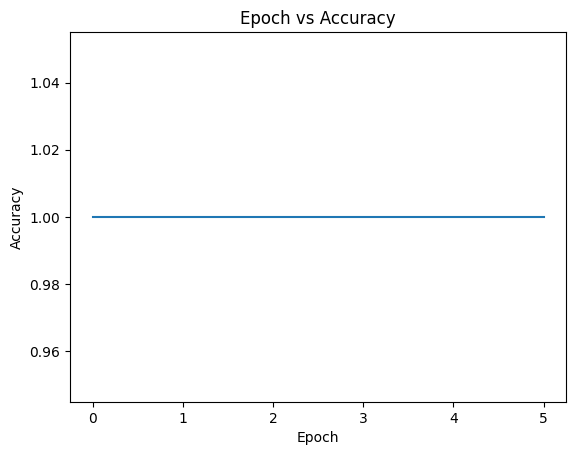


Sklearn model
Model Coefficients w:[[ 1.21740631 -0.16127466]], b:[-5.30180403]
Accuracy:1.0
Error:2.220446049250313e-16


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss,accuracy_score

df = pd.read_csv('data.csv')
x,y = df[['X1','X2']].values,df['Y'].values

def sigmoid(z):
    return 1/(1+np.exp(-z))

def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w)+b)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost /= m
    return cost

def compute_gradient(x,y,w,b):
    m,n = x.shape
    dj_dw,dj_db = np.zeros(n),0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w)+b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i*x[i,j]
        dj_db += err_i
    dj_dw,dj_db = dj_dw/m,dj_db/m
    return dj_dw,dj_db

def gradient_descent(x,y,w_in,b_in,alpha,iters,epochs):
    w,b = copy.deepcopy(w_in),b_in
    j_hist = []
    for epoch in range(epochs+1):
        for i in range(iters+1):
            dj_dw,dj_db = compute_gradient(x,y,w,b)
            w -= alpha*dj_dw
            b -= alpha*dj_db
            j_hist.append(compute_cost(x,y,w,b))
            print(f"Epoch: {epoch}/{epochs} Iteration: {i}/{iters} Cost:{j_hist[i]}")
    return w,b,j_hist

w_tmp,b_tmp,alpha,iters,epochs = np.zeros(x.shape[1]),0.0,0.1,50,5  
w,b,j_hist = gradient_descent(x,y,w_tmp,b_tmp,alpha,iters,epochs)
print(f"Updated parameters Slopes(b1,b2):{w}, b:{b}, cost:{j_hist[-1]}")

def accuracy(x,w,b):
    pred,num_correct_pred = [],0
    m = x.shape[0]
    for i in range(m):
        y_pred = sigmoid(np.dot(w,x[i])+b)
        if y_pred > 0.5:
            num_correct_pred += 1
            pred.append(1)
        elif y_pred < 0.5:
            num_correct_pred += 1
            pred.append(0)
    accuracy = num_correct_pred/len(pred)
    return accuracy

accuracy_manual = accuracy(x,w,b)
print(f"Accuracy of the model:{accuracy_manual}")

#1c is not correct 
#Plot the graph of epoch (X-axis) v/s Accuracy (Y-axis).
accuracy_list,epoch_list = [],[]
for epoch in range(epochs+1):
    for i in range(iters+1):
        dj_dw,dj_db = compute_gradient(x,y,w,b)
        w -= alpha*dj_dw
        b -= alpha*dj_db
        acc = accuracy(x,w,b)
        accuracy_list.append(acc)
        epoch_list.append(epoch)

plt.plot(epoch_list,accuracy_list)
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()  

model = LogisticRegression()
model.fit(x,y)
y_pred = model.predict(x)
accuracy_sklearn = accuracy_score(y,y_pred)
logloss = log_loss(y,y_pred)
print(f"\nSklearn model\nModel Coefficients w:{model.coef_}, b:{model.intercept_}\nAccuracy:{accuracy_sklearn }\nError:{logloss}")  


